---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
df = pd.read_csv('fraud_data.csv')

In [3]:
print(df.shape)
df.head()

(21693, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [4]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    target = df['Class']
    Count_1 = target.value_counts()[1]
    
    
    return float(Count_1/len(target))


In [5]:
answer_one()

0.016410823768035772

In [6]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (16269, 29)
y_train (16269,)
X_test (5424, 29)
y_test (5424,)


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [8]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    # Your code here
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    dummy_majority_pred = dummy_majority.predict(X_test)
    
    acc = accuracy_score(y_test, dummy_majority_pred)
    recall = recall_score(y_test, dummy_majority_pred)
    
    return (float(acc),float(recall))

In [9]:
answer_two()

(0.9852507374631269, 0.0)

In [10]:
type(answer_two()[0])

float

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [11]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC().fit(X_train, y_train)
    svm_predicted = svm.predict(X_test)
    
    acc = accuracy_score(y_test, svm_predicted)
    precision = precision_score(y_test, svm_predicted)
    recall = recall_score(y_test, svm_predicted)
    
    return (float(acc),float(recall),float(precision))

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [13]:
svm = SVC(C = 1e9,gamma = 1e-07).fit(X_train, y_train)

In [14]:
svm_decision = svm.decision_function(X_test)
svm_decision

array([ -739.71796843, -1086.16794833,  -696.46339735, ...,  -491.97916719,
        -699.03838333,  -701.93409309])

In [15]:
type(svm_decision)

numpy.ndarray

In [16]:
svm_decision[svm_decision >= -220] = 1
svm_decision[svm_decision < -220] = 0
svm_decision

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [17]:
confusion = confusion_matrix(y_test, svm_decision)

In [18]:
confusion

array([[5320,   24],
       [  14,   66]])

In [19]:
type(confusion)

numpy.ndarray

In [20]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(C = 1e9,gamma = 1e-07).fit(X_train, y_train)
    svm_decision = svm.decision_function(X_test)
    svm_decision[svm_decision >= -220] = 1
    svm_decision[svm_decision < -220] = 0
    confusion = confusion_matrix(y_test, svm_decision)
    
    return confusion

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
clf = LogisticRegression().fit(X_train, y_train)

In [22]:
y_scores_lr = clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)

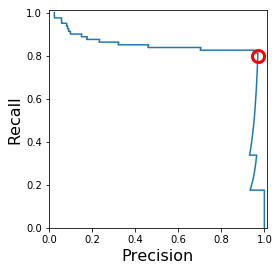

In [23]:
import matplotlib.pyplot as plt
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [24]:
recall[precision==0.75]

array([ 0.825])

In [25]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

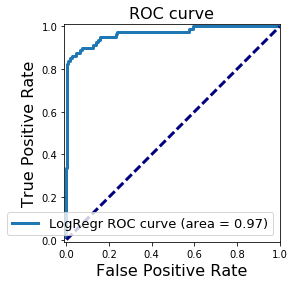

In [28]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [41]:
fpr_lr

array([  0.00000000e+00,   0.00000000e+00,   1.87125749e-04,
         1.87125749e-04,   3.74251497e-04,   3.74251497e-04,
         5.61377246e-04,   5.61377246e-04,   5.23952096e-03,
         5.23952096e-03,   1.47829341e-02,   1.47829341e-02,
         2.69461078e-02,   2.69461078e-02,   4.26646707e-02,
         4.26646707e-02,   6.17514970e-02,   6.17514970e-02,
         7.52245509e-02,   7.52245509e-02,   1.23315868e-01,
         1.23315868e-01,   1.37911677e-01,   1.37911677e-01,
         1.48577844e-01,   1.48577844e-01,   1.59618263e-01,
         1.59618263e-01,   2.04715569e-01,   2.05276946e-01,
         2.16878743e-01,   2.17252994e-01,   2.31287425e-01,
         2.31287425e-01,   2.37836826e-01,   2.37836826e-01,
         2.68899701e-01,   2.69273952e-01,   4.74738024e-01,
         4.75112275e-01,   5.75598802e-01,   5.75598802e-01,
         5.94498503e-01,   5.94498503e-01,   6.83757485e-01,
         6.84131737e-01,   8.69011976e-01,   8.69386228e-01,
         1.00000000e+00]

In [44]:
abs(fpr_lr -0.16)

array([  1.60000000e-01,   1.60000000e-01,   1.59812874e-01,
         1.59812874e-01,   1.59625749e-01,   1.59625749e-01,
         1.59438623e-01,   1.59438623e-01,   1.54760479e-01,
         1.54760479e-01,   1.45217066e-01,   1.45217066e-01,
         1.33053892e-01,   1.33053892e-01,   1.17335329e-01,
         1.17335329e-01,   9.82485030e-02,   9.82485030e-02,
         8.47754491e-02,   8.47754491e-02,   3.66841317e-02,
         3.66841317e-02,   2.20883234e-02,   2.20883234e-02,
         1.14221557e-02,   1.14221557e-02,   3.81736527e-04,
         3.81736527e-04,   4.47155689e-02,   4.52769461e-02,
         5.68787425e-02,   5.72529940e-02,   7.12874251e-02,
         7.12874251e-02,   7.78368263e-02,   7.78368263e-02,
         1.08899701e-01,   1.09273952e-01,   3.14738024e-01,
         3.15112275e-01,   4.15598802e-01,   4.15598802e-01,
         4.34498503e-01,   4.34498503e-01,   5.23757485e-01,
         5.24131737e-01,   7.09011976e-01,   7.09386228e-01,
         8.40000000e-01]

In [47]:
tpr_lr[np.where(abs(fpr_lr -0.16)<1e-3)][0]

0.9375

In [48]:
tpr_lr[np.where(abs(fpr_lr -0.16)<1e-3)][1]

0.94999999999999996

In [ ]:
def answer_five():
        
    # Your code here
    
    return # Return your answer

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    
    return # Return your answer

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())